## YOLO - Neural Style Transfer (Demo)

This notebook implements a Neural Style Transfer using our code.

## Importing


In [1]:
!pip install -r requirements.txt
!pip install matplotlib

from src.lib.calculation import calculate
from src.lib.config import Config
from src.lib.evaluator import Evaluator as BaseEvaluator
from src.lib.helpers import *
from PIL import Image
from keras.applications.vgg16 import VGG16
from IPython.display import clear_output
import matplotlib.pyplot as plt

## Loading images

To transfer the style of one image into another we need to choose an image with the content and one image with the desired style. Our model can transform the style of arbitrary images. 

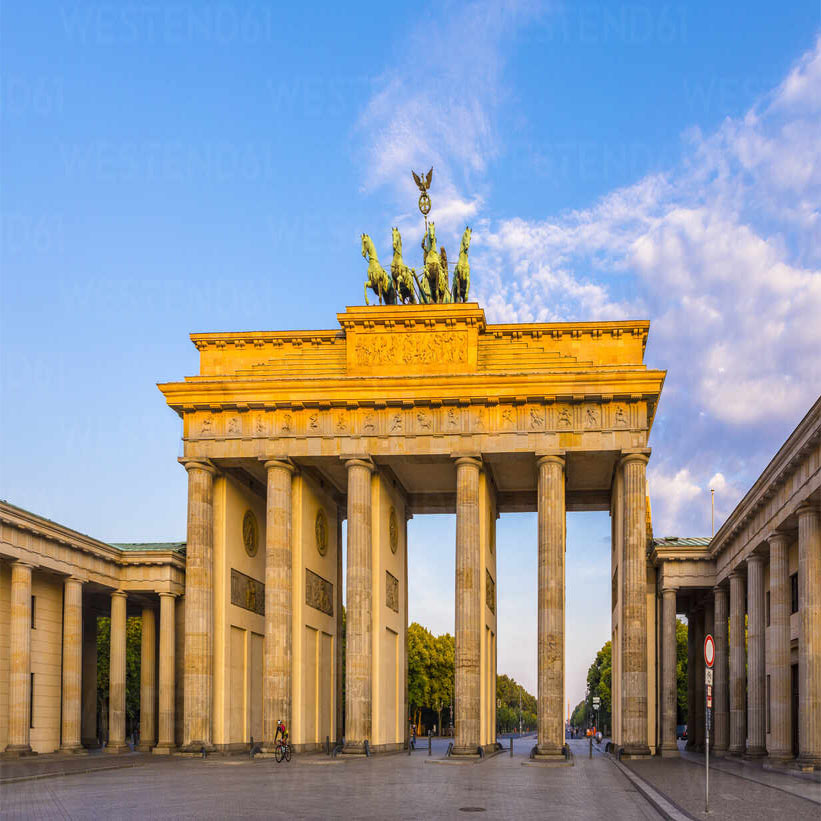

In [2]:
content_image = Image.open('in/content/brandenburger-tor.jpg')
content_image


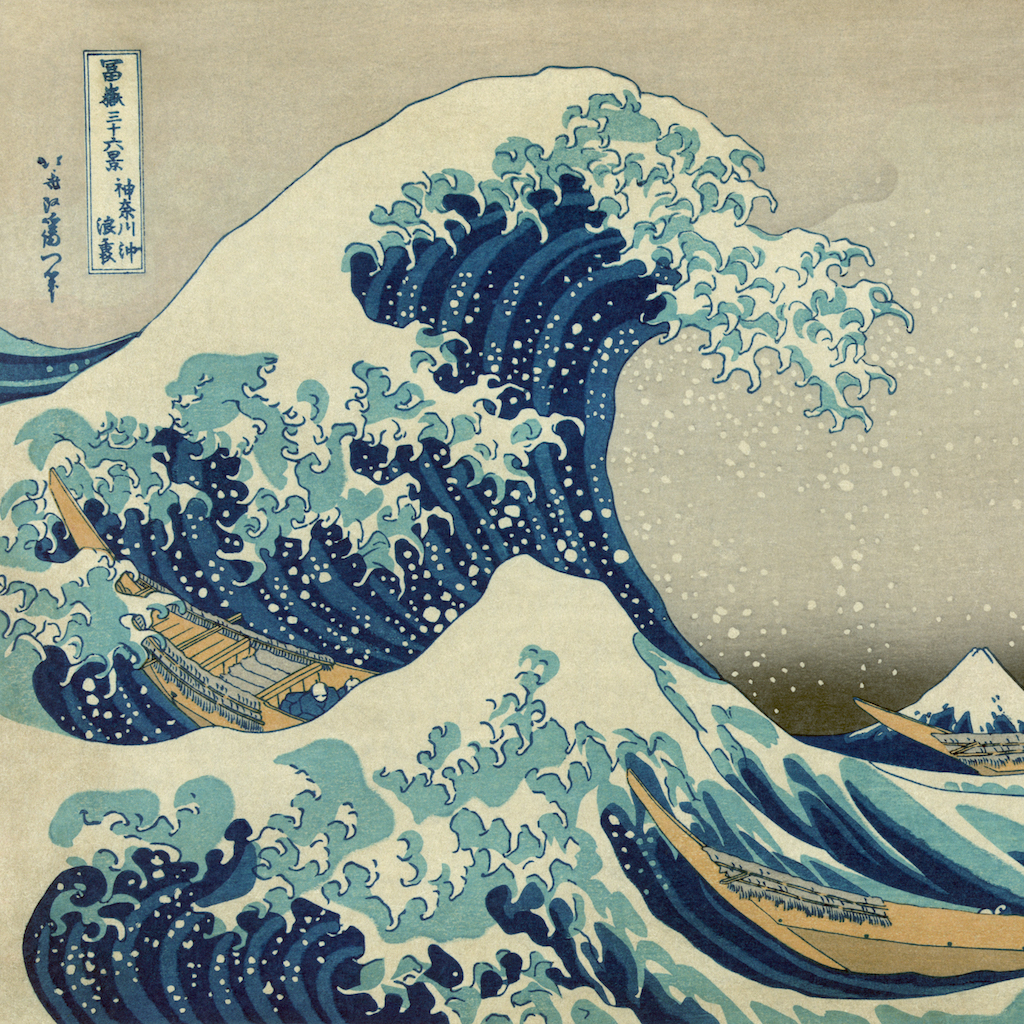

In [3]:
style_image = Image.open('in/style/wave.jpg')
style_image

## Set up a custom Evaluator for VGG16 Model



If you want to modify the evaluation taking place during the image style transfer, you can simply define your own, custom Evaluator.  
You can also customize the loss function, change how the generated image is initialized or how the gradients are computed.

In [4]:
class Evaluator(BaseEvaluator):
    dimensions = (512, 512)
    style_layers = ['block1_conv2', 'block2_conv2',
                    'block3_conv3', 'block4_conv3',
                    'block5_conv3']
    content_layers = ['block2_conv2']

    @classmethod
    def preprocess_image(cls, img):
        return preprocess_image_imagenet(img, cls.dimensions)

    @classmethod
    def postprocess_image(cls, img):
        return postprocess_image_imagenet(img, cls.dimensions)

    def setup_model(self):
        self.model = VGG16(input_tensor=self.input_tensor, weights='imagenet',
                           include_top=False)

## Configuration


Now, you simply initialize an `Config` object with the defined Evaluator.

In [5]:
config = Config(Evaluator)
config.set_style(style_image)
config.set_content(content_image)
config.content_weight = 0.025
config.style_weight = 12.0
config.total_variation_weight = 10.0
config.num_iterations = 10

## Generating the resulting Image

To actually generate the Image, we now simply call the `calculate` function, passing only the Config Object.

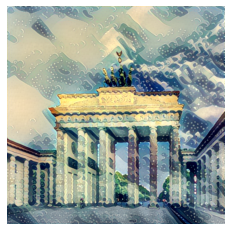

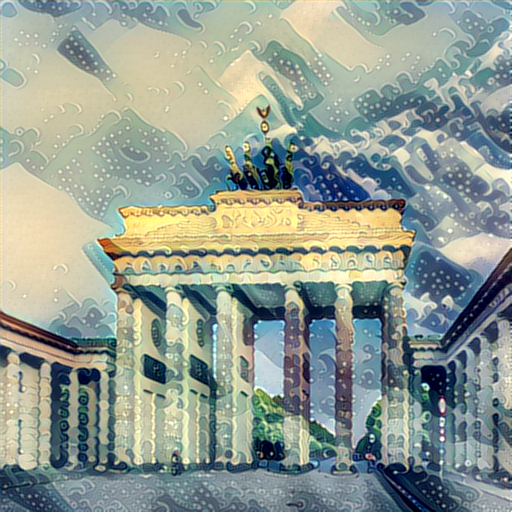

In [6]:
def show_image(img, i):
    clear_output()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

calculate(config, show_image)
